### Properati

El dataset contiene información al comienzo de 2018 de las propiedades comercializables por la empresa:

* Fecha de creación
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m²
* Superficie cubierta en m²
* Precio en USD/m²
* Precio por m²
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto

#### Descargamos los datos

In [ ]:
import pandas as pd
import numpy as np

In [2]:
%%time
# Descargo 4 meses de 2018
url = 'https://www.properati.com.ar/static/data/AR/properati-AR-2018-0{}-01-properties-sell.csv'
df = pd.concat((pd.read_csv(url.format(i)) for i in range(1,5)))

CPU times: user 19 s, sys: 1.61 s, total: 20.6 s
Wall time: 4min 38s


In [3]:
print(df.shape)
print(df.columns)
df.head()

(726873, 27)
Index(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0de2467efb2476545515f109b506e084728ea6a2,2017-03-01,sell,house,Merlo,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|,Argentina,Bs.As. G.B.A. Zona Oeste,3430696.0,"-34.67561,-58.725101",...,NaN,3579.104478,NaN,NaN,NaN,NaN,https://www.properati.com.ar/16219_venta_casa_...,Esta Hermosa Casa en Palermo Soho ha sido comp...,Hermosa casa en el corazón de Palermo Soho con...,https://thumbs4.properati.com/2/fgnyoK0fxWVVSt...
1,cb23211cab9f6183df65c01f6be24bb48f4dca62,2016-09-20,sell,house,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.1081928835,-56.8638181686",...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/11ivz_venta_casa_...,VILLA FLORENCIA - UF 8Excelente Triplex de 4 a...,VILLA FLORENCIA - CATEGORICO DUPLEX EN VENTA,https://thumbs4.properati.com/9/HsivdwoTMfLmQs...
2,4f62d7c3f374570841ab10a3cbe6cca938e21484,2016-03-16,sell,house,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.0916153921,-56.8460414663",...,NaN,380.228137,NaN,NaN,NaN,NaN,https://www.properati.com.ar/x8lk_venta_casa_p...,"Living, comedor, amplia cocina, 2 dormitorios ...","EXCELENTE CASA EN VENTA, EN EXCLUSIVA ZONA DE ...",https://thumbs4.properati.com/1/uceBSr80OcW09k...
3,1649a3c35359d681abae4a63d9a8545054d2096b,2017-09-22,sell,house,Palermo Viejo,|Argentina|Capital Federal|Palermo|Palermo Viejo|,Argentina,Capital Federal,NaN,"-34.5889531469,-58.4298817776",...,NaN,6410.256410,NaN,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,Beautiful Florentine Style house.Needs renova...,"Beautiful Florentine Style house, ideal for Ho...",https://thumbs4.properati.com/8/JNr4sMiKencV51...
4,dee414c7198dd58137279f0afc56551481535cdc,2017-09-22,sell,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6098446,-58.3662387",...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/2sx_venta_departa...,Excelente departamento de 3 ambientes con Vist...,Dock - 3 amb con excelente vista a Dique,https://thumbs4.properati.com/8/9zrfZYTNM3NOAI...


#### Limpieza y Feature Selection

* Para predecir, vamos a usar las columnas 'surface_total_in_m2' ,  'surface_covered_in_m2' ,  'lat', 'lon' por un lado como data tabular, y la columna "description" como input de texto.
* Nuestro target será "price". 

In [ ]:
df = df.drop_duplicates(subset=['id', 'lat-lon'])

In [5]:
# "operation" no aporta informacion
df.operation.value_counts()

sell    274235
Name: operation, dtype: int64

In [ ]:
# Hay varias columnas relacionadas con el precio, hay que sacarlas para evitar data leak
# Nos quedamos solo con "price" (usd)

df = df.drop(['operation', 'lat-lon', 'price_per_m2', 'price_usd_per_m2', 'price_aprox_usd', 
              'price_aprox_local_currency'], axis = 1)

In [ ]:
# Para que la muestra sea más representativa generalizamos solo a Bs As

df = df.loc[df['state_name'].isin(['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste']),:]

In [8]:
# Vemos nulos
df.isnull().sum()

id                              0
created_on                      0
property_type                   0
place_name                    101
place_with_parent_names         0
country_name                    0
state_name                      0
geonames_id                 43158
lat                         35853
lon                         35853
price                       14246
currency                    14249
surface_total_in_m2         37401
surface_covered_in_m2       23056
floor                      164307
rooms                       66126
expenses                   161511
properati_url                   0
description                     3
title                           0
image_thumbnail              2149
dtype: int64

In [9]:
df.currency.value_counts()

USD    161934
ARS      4993
PEN         2
Name: currency, dtype: int64

In [ ]:
# Usamos solo los precios en USD
df = df.loc[df['currency'] == 'USD']

In [11]:
df.describe()

,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
count,1.223380e+05,130072.000000,130072.000000,1.619340e+05,130965.000000,1.443970e+05,15652.000000,104474.000000,1.884300e+04
mean,3.498150e+06,-34.587454,-58.524294,2.973313e+05,291.661681,1.900303e+02,8.163813,3.097173,5.405193e+03
std,4.413296e+05,0.203682,0.285698,4.176873e+05,1755.366668,8.699317e+03,58.280443,1.580869,1.054622e+05
min,3.427208e+06,-41.135527,-71.352240,5.000000e+03,-2.000000,1.000000e+00,1.000000,1.000000,1.000000e+00
25%,3.429595e+06,-34.640273,-58.628716,1.150000e+05,57.000000,5.000000e+01,2.000000,2.000000,1.200000e+03
50%,3.430570e+06,-34.594557,-58.490490,1.850000e+05,111.000000,9.000000e+01,3.000000,3.000000,2.500000e+03
75%,3.435506e+06,-34.503677,-58.413423,3.400000e+05,255.000000,1.860000e+02,6.000000,4.000000,5.000000e+03
max,6.693230e+06,-26.861151,-56.160010,4.654544e+07,200000.000000,3.243242e+06,3485.000000,40.000000,1.000150e+07


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
# Cortamos outliers por percentil en todas las columnas numericas, y normalizamos

top_q, bottom_q = 0.998, 0.002
df.loc[:, df.dtypes == np.number] = df.loc[:, df.dtypes == np.number]
      .apply(lambda x, top, bottom: x[(x.quantile(bottom) < x) & (x.quantile(top) > x)], args = (top_q, bottom_q))
      .apply(lambda x: (x - x.mean()) / x.std())

In [ ]:
cols = ['surface_total_in_m2', 'surface_covered_in_m2', 'lat','lon', 'price', 'description', 'title']

# Columnas a usar 
df = df.loc[:, cols]
df = df.sample(frac=1.)
df = df.dropna()

In [ ]:
y = df.loc[:, 'price'].values
X_num = df.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'lat','lon']].values
txts = (df['title'] + ' ' + df['description']).str.lower().replace('^\w', ' ')

In [16]:
print('Media del target (USD):', np.mean(y))
print('Std del target (USD):', np.std(y))

y = (y - np.mean(y)) / np.std(y)

Media del target (USD): 0.0029852623477787652
Std del target (USD): 0.9876834898076582


## Preprocesamiento

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
!pip install unidecode

    100% |████████████████████████████████| 235kB 15.3MB/s 


In [19]:
%%time
from re import findall
import unidecode 
txts = txts.apply(lambda x: ' '.join(unidecode.unidecode(w) for w in findall('[a-z]+', x) if w not in stopwords))

CPU times: user 40.9 s, sys: 39.2 ms, total: 40.9 s
Wall time: 41 s


In [20]:
#??? 
len(set([s_ for s in txts.values for s_ in s.split(' ')]))

75524

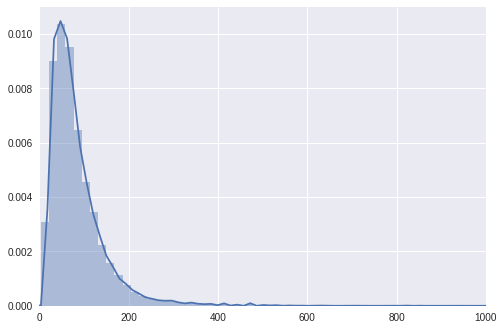

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

arr = txts.apply(lambda x: len(x.split(' ')))
sns.distplot(arr, bins = 100)
plt.xlim([0, 1000]);

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 190
max_words = 10000

Using TensorFlow backend.


In [23]:
%%time
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n', )
tokenizer.fit_on_texts(txts)
sequences = tokenizer.texts_to_sequences(txts)

word_index = tokenizer.word_index
print('Tenemos %d palabras' % len(word_index))

X_txt = pad_sequences(sequences, maxlen=max_len)

Tenemos 75524 palabras
CPU times: user 13.2 s, sys: 83.8 ms, total: 13.3 s
Wall time: 13.3 s


In [ ]:
n = y.shape[0]
train, test, val = 0.8, 0.12, 0.08
(X_num_train, X_txt_train, y_train), (X_num_test, X_txt_test, y_test), (X_num_val, X_txt_val, y_val) =[(X_num[ix], X_txt[ix], y[ix]) for ix in np.split(np.random.permutation(n), [int(train * n), int((train + test) * n)])]

In [25]:
X_num_train.shape, X_num_test.shape, X_num_val.shape, X_txt_train.shape, X_txt_test.shape, X_txt_val.shape, y_train.shape, y_test.shape, y_val.shape

((79854, 4),
 (11978, 4),
 (7986, 4),
 (79854, 190),
 (11978, 190),
 (7986, 190),
 (79854,),
 (11978,),
 (7986,))

## Machine Learning
### Tensorboard


In [26]:
# Creamos el tunel para conectarse a la consola:
# https://github.com/localtunnel/localtunnel
! npm install -g localtunnel
# Tunnel port 6006 (TensorBoard ya corriendo)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')
# Tomar url
! cat url.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.1
added 54 packages from 31 contributors in 2.547s


In [ ]:
log_path = '/tmp/log'
get_ipython().system_raw(
   'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
   .format(log_path)
)

### Utils

In [ ]:
# Definimos una métrica custom, el R2 o coefficiente de determinación
# https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n

from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_hist(history):
  plt.subplot(121)
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model MSE')
  plt.ylabel('MSE')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.ylim((0, 2))
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.ylim((0, 2))
  plt.show()

### Transfer Learning

In [31]:
# ~2 min
# Bajamos embeddings fasttext preentrenados
!wget http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.3.6.e20.vec.gz
!yes n | gunzip fasttext-sbwc.3.6.e20.vec.gz

--2018-10-19 06:53:53--  http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.3.6.e20.vec.gz
Resolving dcc.uchile.cl (dcc.uchile.cl)... 192.80.24.4
Connecting to dcc.uchile.cl (dcc.uchile.cl)|192.80.24.4|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.3.6.e20.vec.gz [following]
--2018-10-19 06:53:54--  https://www.dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.3.6.e20.vec.gz
Resolving www.dcc.uchile.cl (www.dcc.uchile.cl)... 192.80.24.4
Connecting to www.dcc.uchile.cl (www.dcc.uchile.cl)|192.80.24.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://users.dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.3.6.e20.vec.gz [following]
--2018-10-19 06:53:55--  https://users.dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.3.6.e20.vec.gz
Resolving users.dcc.uchile.cl (users.dcc.uchile.cl)... 192.80.24.4
Connecting to users.dcc.uchile.cl

In [33]:
%%time
import os

# Leemos los embeddings y armamos un diccionario

embedding_dim = 300

emb_dir = os.getcwd()

embeddings_index = {}
f = open(os.path.join(emb_dir, 'fasttext-sbwc.3.6.e20.vec'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 855381 word vectors.
CPU times: user 1min 2s, sys: 1.83 s, total: 1min 4s
Wall time: 1min 4s


In [ ]:
# Volcamos el diccionario en un numpy array para usar con nuestro modelo

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Las palabras no encontradas en el índice serán todos ceros
            embedding_matrix[i] = embedding_vector

#### Callbacks

In [27]:
!pip install python-telegram-bot

    100% |████████████████████████████████| 327kB 23.4MB/s 
    100% |████████████████████████████████| 2.1MB 13.9MB/s 
    100% |████████████████████████████████| 430kB 26.6MB/s 
    100% |████████████████████████████████| 102kB 30.1MB/s 
    100% |████████████████████████████████| 163kB 31.9MB/s 
  Running setup.py bdist_wheel for pycparser ... done
  Stored in directory: /root/.cache/pip/wheels/f2/9a/90/de94f8556265ddc9d9c8b271b0f63e57b26fb1d67a45564511
Successfully built pycparser


In [ ]:
# Config de telegram
config= {
    'token': '',   # bot token
    'telegram_id': 0,                                   # telegram_id
}

In [36]:
!git clone https://github.com/qubvel/keras_telegram_callback.git
!cd keras_telegram_callback

Cloning into 'keras_telegram_callback'...
remote: Enumerating objects: 28, done.
remote: Total 28 (delta 0), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (28/28), done.


In [ ]:
from keras_telegram_callback.callbacks import TelegramCallback
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras import backend as K

In [ ]:
class TelegramCallbackVerbose(TelegramCallback):
  def on_train_begin(self, logs={}):
        text = 'Start training model {}, {}.'.format(CODE, str(params_))
        self.send_message(text)
  def on_epoch_end(self, epoch, logs={}):
        text = 'Code {}. Epoch {}.\n'.format(CODE, epoch)
        for k, v in logs.items():
            text += '{}: {:.4f}; '.format(k, v)
        self.send_message(text)

In [ ]:
class PrintLRCallback(Callback) :
    def on_epoch_begin(self, epoch, logs=None):
        lr = float(K.get_value(self.model.optimizer.lr))
        print(" epoch={:02d}, lr={:.5f}".format( epoch, lr))

In [ ]:
import requests as rq

# Declaramos el callback para SGD con restarts
url_sgdr = 'https://gist.github.com/jeremyjordan/5a222e04bb78c242f5763ad40626c452/raw/1c2ade91682976896d84a2d42f69dcd5798f5f56/sgdr.py'
exec(rq.get(url_sgdr).text)

# No funciona
# Declaramos el optimizador AdamW
#url_adamw = 'https://github.com/shaoanlu/AdamW-and-SGDW/raw/master/AdamW.py'
#exec(rq.get(url_adamw).text)


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Dropout, Concatenate, BatchNormalization, GRU, LSTM, TimeDistributed
from tensorflow.keras import regularizers


def make_model(X_train, y_train, X_val, y_val, params):
    global CODE
    CODE = np.random.randint(0,1000000)
        
    tab_model = Sequential()
    tab_model.add(Dense(params['dense1_n'], input_shape = (4,), activation = params['dense1_act']))
    tab_model.add(Dropout(params['dense1_drop']))
    tab_model.add(Dense(params['dense2_n'], activation = params['dense2_act'], name='dense2'))
    tab_model.add(Dropout(params['dense2_drop']))

    if params['deep_input'] == True:
      tab_model.add(Dense(params['dense2_n'], activation = params['dense2_act']))
      tab_model.add(Dropout(params['dense2_drop']))

    tab_inp = Input(shape=(4, ), name = 'tab')
    tab_out = tab_model(tab_inp)
        
    txt_inp = Input(shape=(max_len,), name = 'txt')
    
    emb = Embedding(input_dim = max_words, output_dim=embedding_dim, input_length=max_len, name = 'emb')(txt_inp)
    
    x0_ = LSTM(params['lstm1_n'], return_sequences=True)(emb)
    x0 = Dropout(params['lstm1_drop'])(x0_)
    x0 = LSTM(params['lstm2_n'], return_sequences= params['deep_lstm'])(x0)
    x0 = Dropout(params['lstm2_drop'])(x0)
    
    if params['deep_lstm'] == True:
      x0 = LSTM(params['lstm3_n'])(x0)
      x0 = Dropout(params['lstm3_drop'])(x0)

    x1 = Flatten()(emb)
    x1 = Dense(params['dense3_n'], activation = params['dense3_act'])(x1)
    x1 = Dropout(params['dense3_drop'])(x1)

    if params['deep'] == True:
      x1 = Dense(params['dense4_n'], params['dense4_act'])(x1)
      x1 = Dropout(params['dense4_drop'])(x1)

    x = Concatenate(axis=-1)([x0, x1])
    
    if params['deep'] == True:
      x = Dense(params['dense5_n'], params['dense5_act'])(x)
      x = Dropout(params['dense5_drop'])(x)
    
    txt_out = Dense(params['dense6_n'], params['dense6_act'])(x)
     
    if params['residual']:
      conc = Concatenate(axis=-1)([tab_out, txt_out, x0])
    else:
      conc = Concatenate(axis=-1)([tab_out, txt_out])
    
    x = Dense(params['dense8_n'], params['dense8_act'])(conc)
    x = Dropout(params['dense8_drop'])(x)

    if params['deep_output'] == True:
      x = Dense(params['dense9_n'], params['dense9_act'])(x)
      x = Dropout(params['dense9_drop'])(x)
  
    pred = Dense(1, activation='linear')(x)
    
    model = Model(inputs=[tab_inp, txt_inp], outputs=[pred])
    
    print_lr = PrintLRCallback()
    tel = TelegramCallbackVerbose(config)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00005, verbose=1)
    early = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
    tensorb = TensorBoard(log_dir= log_path)
    check = ModelCheckpoint('modelcheck{}.h5'.format(CODE), verbose=1, save_best_only=True)
    sgdr = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=156)
                
    model.get_layer('emb').set_weights([embedding_matrix])
    model.get_layer('emb').trainable = False
    model.compile(optimizer= params['optimizer'](lr=params['lr'], amsgrad=params['amsgrad'], epsilon = params['epsilon']),
              loss=params['loss'],
              metrics=['mae', coeff_determination])
       
    history = model.fit([X_train[0], X_train[1]], y_train,
            epochs=params['epochs'],
            batch_size=params['batch'],
            validation_data= ([X_val[0], X_val[1]], y_test),
            callbacks = [tel, reduce_lr, early, tensorb, check, print_lr, sgdr]
                       )
    tel.bot.send_document(document=open('modelcheck{}.h5'.format(CODE), 'rb'), chat_id=119657272)
    
    return model, history

In [ ]:
X_train = [X_num_train, X_txt_train]
X_test = [X_num_test, X_txt_test]

In [ ]:
# Random Search
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
params = {'batch': [128, 256, 512],
 'deep': [0, 1],
 'deep_input': [0, 1],
 'deep_lstm': [0, 1],
 'residual': [0, 1],
 'deep_output': [0, 1],
 'dense1_act': 'tanh',
 'dense1_drop': (0, 0.5, 5),
 'dense1_n': [32, 64, 96],
 'dense2_act': 'relu',
 'dense2_drop': (0.1, 0.4, 5),
 'dense2_n': 32,
 'dense3_act': 'tanh',
 'dense3_drop': (0.1, 0.6, 6),
 'dense3_n': [8,16,32],
 'dense4_act': 'relu',
 'dense4_drop': 0.03333333333333333,
 'dense4_n': [32, 64, 96],
 'dense5_act': 'tanh',
 'dense5_drop': 0.1,
 'dense5_n': [32, 64, 96],
 'dense6_act': 'relu',
 'dense6_drop': (0, 0.3, 6),
 'dense6_n': 32,
 'dense7_act': 'tanh',
 'dense7_drop': 0.03333333333333333,
 'dense7_n': 32,
 'dense8_act': ['relu', 'tanh'],
 'dense8_drop': 0,
 'dense8_n': [32, 64, 96],
 'dense8_act': ['relu', 'tanh'],
 'dense8_drop': 0,
 'dense8_n': [32, 64, 96],
 'dense9_act': ['relu', 'tanh'],
 'dense9_drop': 0,
 'dense9_n': [32, 64, 96],
 'epochs': 18,
 'kernel_regularizer': 0.,
 'loss': 'mse',
 'lstm1_drop': 0.2,
 'lstm1_n': [8,16,32],
 'lstm2_drop': 0.03333333333333333,
 'lstm2_n': [8,16,32],
 'lstm3_drop': 0.06666666666666667,
 'lstm3_n': [4,8,16],
 'max_val_coeff': 0.8245,
 'min_val_loss': 0.1692,
  'epsilon' : 1e-08,
  'amsgrad': [True, False],
  'lr': [0.1, 0.01, 0.005, 0.002, 0.001, 0.0005],
 'optimizer': [Adam]}

In [ ]:
scores = []
for i in range(1, 100):
  params_ = {}
  for k in params:
    if type(params[k]) == tuple:
      params_[k] = np.random.choice(np.linspace(*params[k]))
    elif type(params[k]) == list:
      params_[k] = np.random.choice(params[k])
    else:
      params_[k] = params[k]
  model, history = make_model(X_train = X_train, y_train = y_train, X_val = X_test, y_val= y_test, params=params_)
  scores.append((history, params_))